### Theoretical cluster count covariances using TJPCov.
This notebook shows how to use TJPCov to calculate covariances, given a .sacc file.

We will
* Read in an appropriate yaml file
* Instantiate a `CovarianceBuilder` for cluster counts
* Calculate cluster count covariances and assemble the matrix
* Display the covariance / correlation coefficient
* Save the covariance back to .sacc

In [3]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pyccl as ccl
import sacc
import pickle
from tjpcov_new.covariance_io import CovarianceIO
from tjpcov_new.covariance_clusters import CovarianceClusterCounts

The .yaml file contains the reference to the .sacc file - so specify which .sacc file you want to use there. You can also specify if you want to use MPI or not.

This is a lengthy computation, so `mock_clusters_small.sacc` is small (only 2 richness, 2 redshift bins) to test calculations

In [8]:
input_yml = './tjpcov_conf_minimal_clusters.yaml'

In [2]:
nxn_cov = CovarianceClusterCounts(input_yml)
# TJPCov covariance
cov_nxn = nxn_cov.get_covariance()

A value in x_new is below the interpolation range. 
Value you tried to interpolate: 44.4012034150424 Mpc, 
                Input r 44.4012034150424, 44.4012034150424
            Valid range range: [83.40272837783901, 5573.976948791974] Mpc
evaluating M1_true_vec (this may take some time)...


In [ ]:
# Uncomment to save the covariance array to pickle
# fname = "cov_nxn_copy.pkl"
# with open(fname, 'wb') as ff:
#         pickle.dump(cov_nxn, ff)

That's it! Now you have a covariance matrix. 

Loading the pre-calculated covariance from pickle, we can now display it and save it to the .sacc file.

In [4]:
with open(f"cov_nxn.pkl", 'rb') as cov_file:
    cov_nxn = pickle.load(cov_file)
correlation = np.corrcoef(cov_nxn)

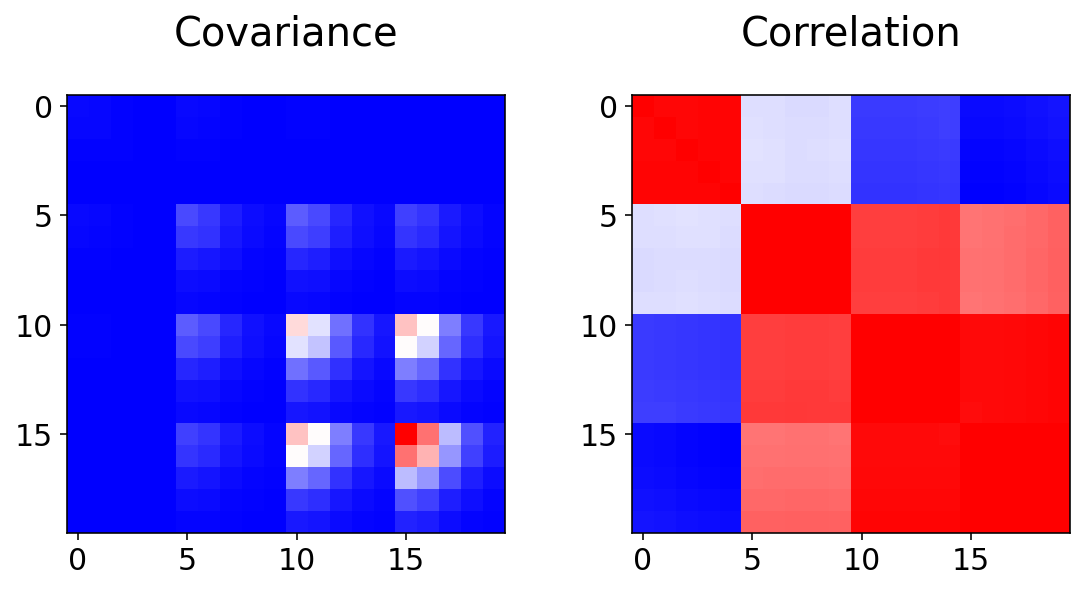

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(cov_nxn, cmap='bwr')
ax[0].set_title('Covariance')
ax[1].imshow(correlation, cmap='bwr')
ax[1].set_title('Correlation')

plt.tight_layout()

Using CovarianceIO we can write the covariance into the sacc file.  Doing so below and reloading it to demonstrate its properly saving.

In [9]:
cov_io = CovarianceIO(input_yml)
cov_io.create_sacc_cov(cov_nxn, output='mock_clusters_with_cov.sacc')
sacc_with_cov = sacc.Sacc.load_fits('mock_clusters_with_cov.sacc')

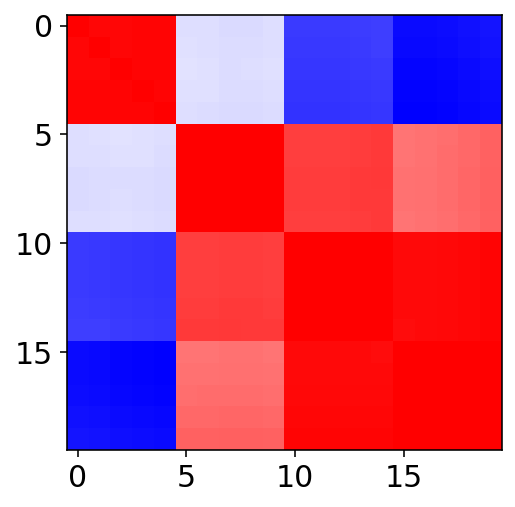

In [12]:
plt.figure(figsize=(4,4))
plt.imshow(np.corrcoef(sacc_with_cov.covariance.covmat), cmap='bwr')